In [2]:
library('tidyverse')

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.3     ✔ dplyr   1.0.7
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



# Review

`ggplot`

arguments: 
1. data ("dataframe")
1. aesthetic mappint (how to "encode" our data with chart markings)

`geom_`

Chart "marks." Bars, points, lines, etc. All markings have a corresponding `geom_` function.

`scale_`

The `scale_` function fine tunes our encodings (colors, the label text, etc.).

e.g.

`scale_x_log10()`

or,

`scale_color_brewer(palette = 'Set2')`

`theme_` and `theme`

Adjust our chart's appearance—that is, things like axis text font, background color, grid lines. etc. 

# Advanced usage

Encodings and data are passed from the `ggplot` function to geoms.

```R
p = ggplot(mpg, aes(x = displ, y = hwy))

# the data and mappings are passed to geom_point here
p = p + geom_point()

p
```

We can also pass our data and encodings directly the `geom_` functions.

In [4]:
library('palmerpenguins')
library('scales')
options(repr.plot.height = 3, repr.plot.width = 5, repr.plot.res = 250)


Attaching package: ‘scales’


The following object is masked from ‘package:purrr’:

    discard


The following object is masked from ‘package:readr’:

    col_factor




Warning message:
“Removed 2 rows containing missing values (geom_point).”


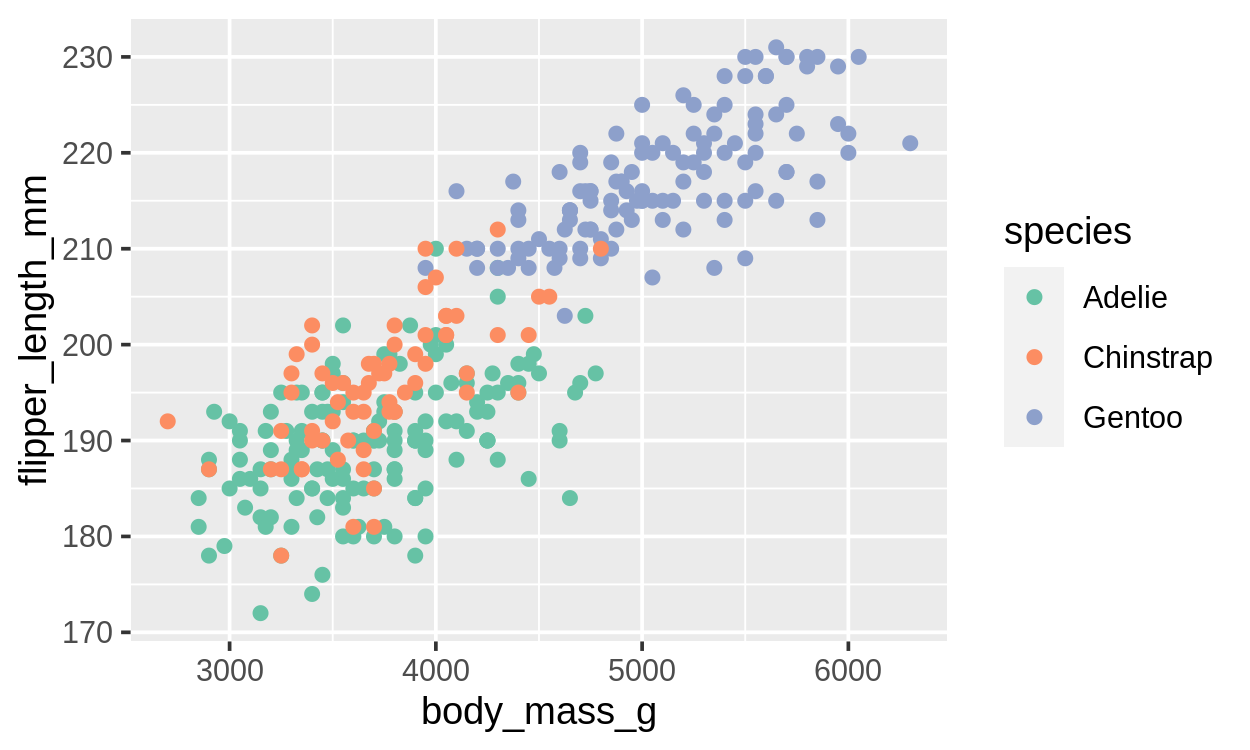

In [3]:
p = ggplot()
           
# why are we using the argument names here?
p = p + geom_point(data = penguins, 
                   mapping = aes(x = body_mass_g, y = flipper_length_mm, color = species))

p = p + scale_color_brewer(palette = 'Set2')

p

When is it useful to exploit this other `ggplot` usage?

Warning message:
“Removed 6 rows containing missing values (geom_point).”
Warning message:
“Removed 2 rows containing missing values (geom_point).”


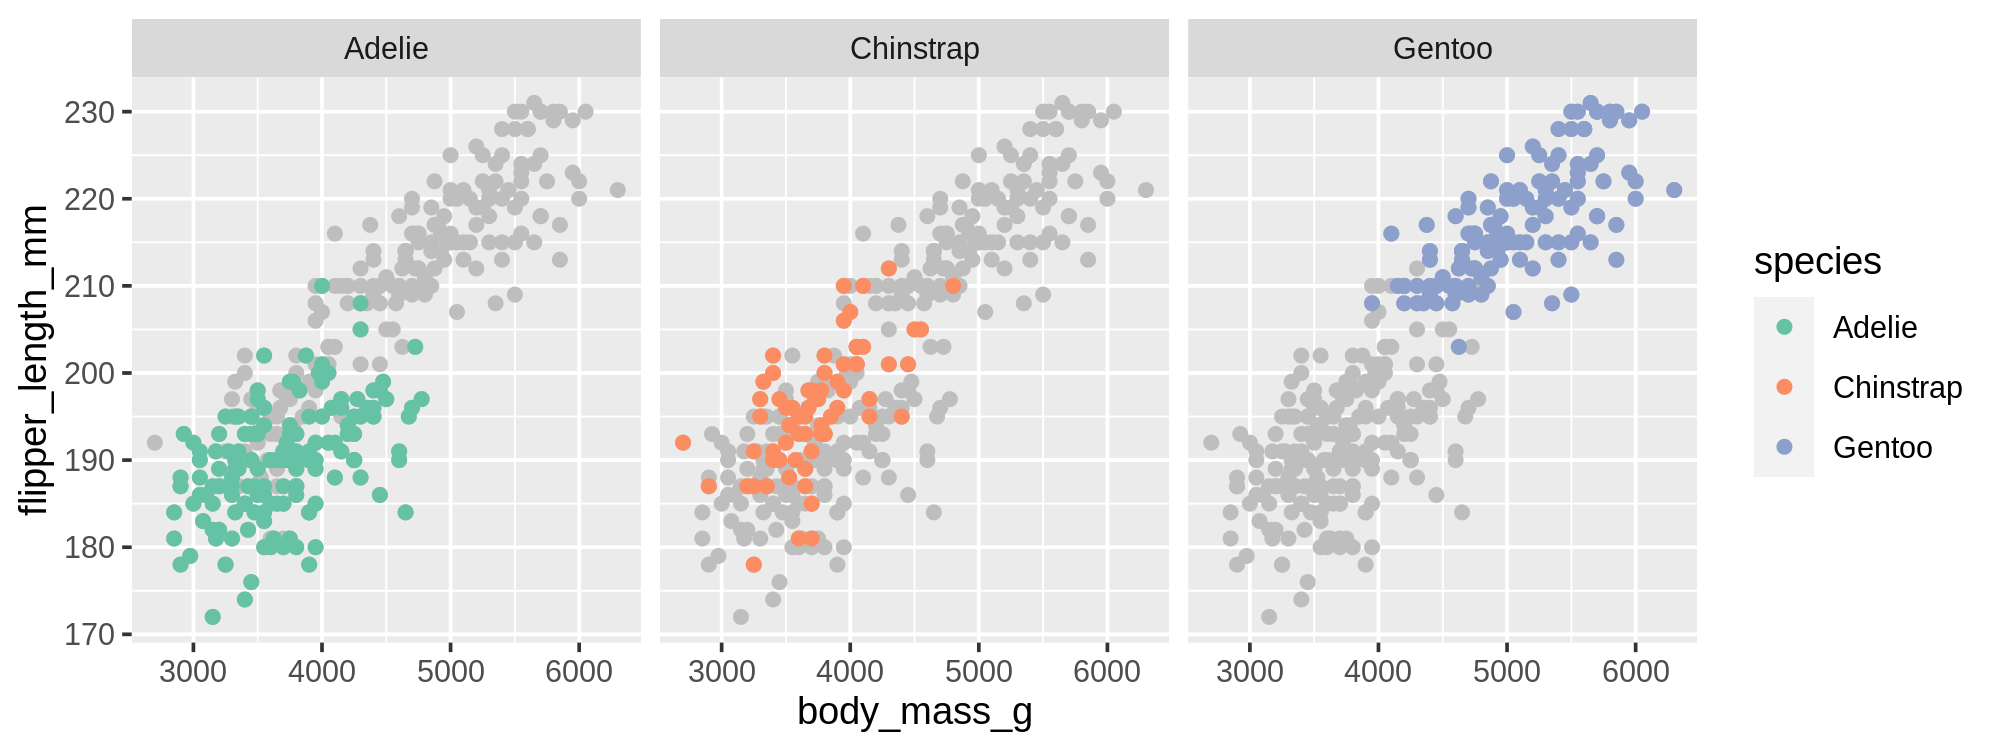

In [12]:
options(repr.plot.height = 3, repr.plot.width = 8, repr.plot.res = 250)
p = ggplot(penguins, aes(x = body_mass_g, y = flipper_length_mm, color = species))
           
p = p + geom_point(color = 'gray', data = penguins %>% select(-species))

p = p + geom_point()

p = p + scale_color_brewer(palette = 'Set2')

p = p + facet_wrap(~species)

p

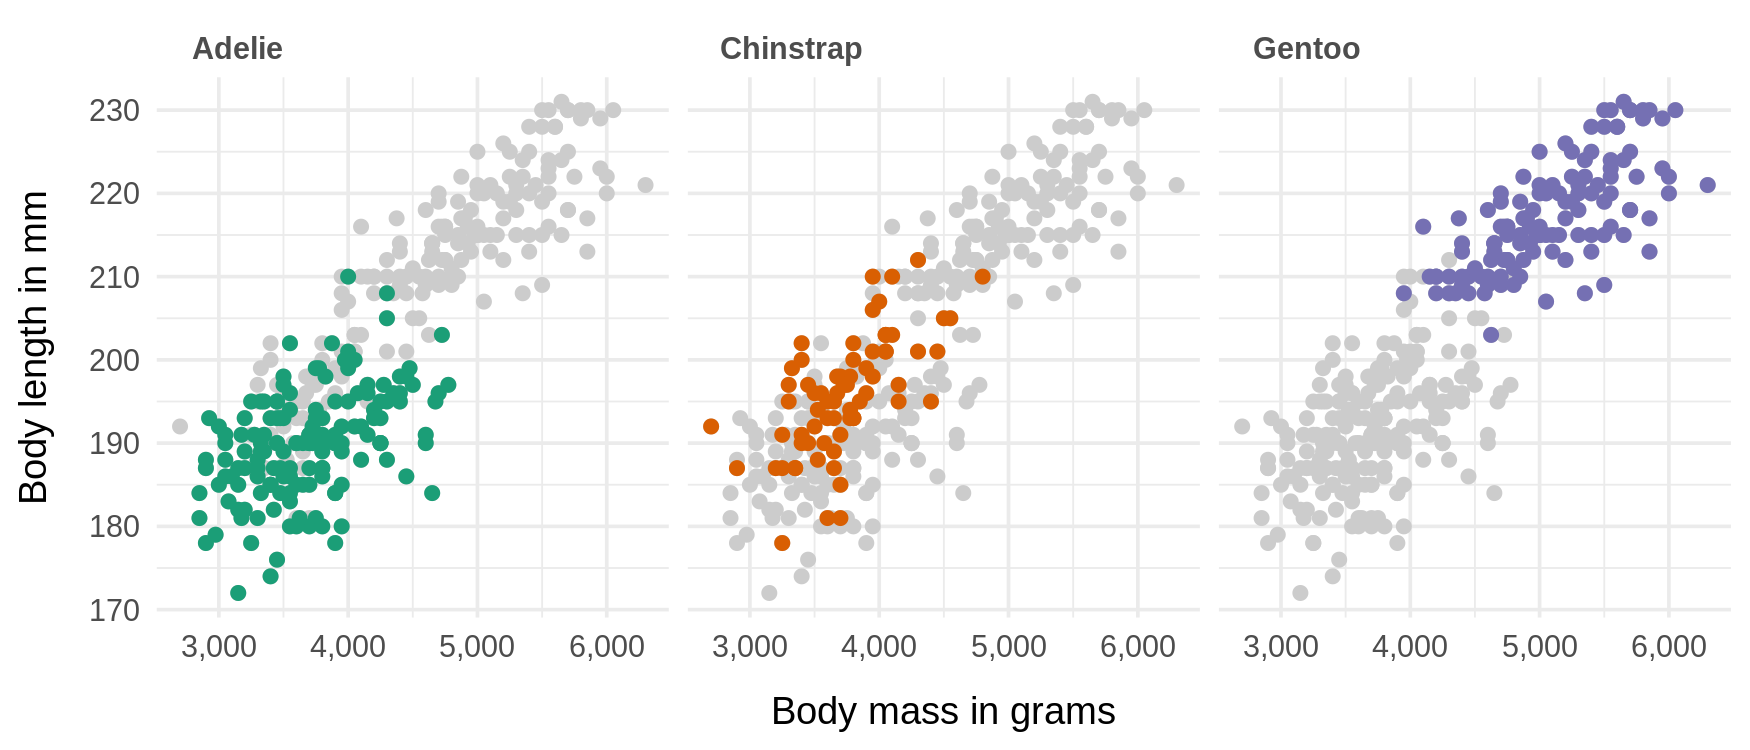

In [26]:
options(repr.plot.height = 3, repr.plot.width = 7, repr.plot.res = 250)

p = ggplot(penguins, aes(x = body_mass_g, y = flipper_length_mm, color = species))
           
p = p + geom_point(color = 'grey80', data = penguins %>% select(-species), na.rm = T)

p = p + geom_point(na.rm = T)

p = p + facet_wrap(~species)

p = p + scale_color_brewer(palette = 'Dark2')

p = p + scale_x_continuous(labels = comma)

p = p + theme_minimal()

p = p + labs(x = 'Body mass in grams', y = 'Body length in mm', color = 'some name for color')

p = p + theme(
    axis.title.y = element_text(margin = margin(l = 0, r = 10, t = 0, b = 0)),
    axis.title.x = element_text(margin = margin(l = 0, r = 0, t = 10, b = 0)),
    strip.text = element_text(hjust = 0.05, color = 'grey30', face = 'bold'),
    legend.position = 'none'
)

p